# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Load Data

In [2]:
df = pd.read_csv('Data/part4_tmdb_results_all.csv.gz', lineterminator='\n')
df.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63148 entries, 0 to 63147
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   backdrop_path          40883 non-null  object 
 2   belongs_to_collection  4257 non-null   object 
 3   budget                 63126 non-null  float64
 4   genres                 63126 non-null  object 
 5   homepage               15142 non-null  object 
 6   id                     63126 non-null  float64
 7   original_language      63126 non-null  object 
 8   original_title         63126 non-null  object 
 9   overview               61824 non-null  object 
 10  popularity             63126 non-null  float64
 11  poster_path            58195 non-null  object 
 12  production_companies   63126 non-null  object 
 13  production_countries   63126 non-null  object 
 14  release_date           62044 non-null  object 
 15  re

# 3. Clean Data

## 3.1 Check & remove duplicated rows

In [4]:
#check duplicates
df.duplicated().sum()

21

In [5]:
#remove duplicates
df = df.drop_duplicates()

In [6]:
#check that the duplicates have been dropped
df.duplicated().sum()

0

## 3.2 Check for missing values

In [7]:
#check missing values in each column
df.isna().sum()

adult                        1
backdrop_path            22244
belongs_to_collection    58870
budget                       1
genres                       1
homepage                 47985
id                           1
original_language            1
original_title               1
overview                  1303
popularity                   1
poster_path               4932
production_companies         1
production_countries         1
release_date              1083
revenue                      1
runtime                      1
spoken_languages             1
status                       1
tagline                  38981
title                        1
video                        1
vote_average                 1
vote_count                   1
certification            47885
dtype: int64

**Observation**: There are many missing values in `backdrop_path`, `belongs_to_collection`, `homepage`, `tagline`, and `certification` columns.

There are some missing values in `overview`, `poster_path`, and `release_date` columns.

## 3.3 Check for unnecessary columns

In [8]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG


In [9]:
#check what % of the data are missing for each column
df.isna().sum() / df.shape[0]

adult                    0.000016
backdrop_path            0.352369
belongs_to_collection    0.932565
budget                   0.000016
genres                   0.000016
homepage                 0.760134
id                       0.000016
original_language        0.000016
original_title           0.000016
overview                 0.020641
popularity               0.000016
poster_path              0.078128
production_companies     0.000016
production_countries     0.000016
release_date             0.017156
revenue                  0.000016
runtime                  0.000016
spoken_languages         0.000016
status                   0.000016
tagline                  0.617501
title                    0.000016
video                    0.000016
vote_average             0.000016
vote_count               0.000016
certification            0.758550
dtype: float64

In [10]:
#check the number of unique values in each column
df.nunique()

adult                        2
backdrop_path            40879
belongs_to_collection     2210
budget                    1660
genres                    3944
homepage                 14983
id                       63126
original_language          125
original_title           60339
overview                 61793
popularity               14308
poster_path              58192
production_companies     34910
production_countries      3430
release_date              7829
revenue                   7598
runtime                    240
spoken_languages          2672
status                       3
tagline                  23819
title                    57861
video                        2
vote_average              3518
vote_count                3059
certification               12
dtype: int64

In [11]:
#Display data under this column to determine whether to keep this column or not
#df['belongs_to_collection'].value_counts()

In [12]:
#Display data under this column to determine whether to keep this column or not
#df['homepage'].value_counts()

In [13]:
#Display data under this column to determine whether to keep this column or not
#df['tagline'].value_counts()

**Columns to be dropped due to too many missing data:**
- `backdrop_path` 
   - Reason: More than 35% of the data is missing, and this data does not look useful for hypothesis testing.
- `homepage`
   - Reason: More than 76% of the data is missing, and I will not use this data for hypothesis testing.
   
**Columns to be dropped due to too many unique values:**
- `poster_path`
   - Reason: I will not use this data for hypothesis testing.
        
**Columns with many missing data and unique values, but keeping as they may be useful:**
- `tagline`
   - Reason: More than 61.7% of the data is missing, but it may be utilized for comparing some target between two groups: (a) movies with tagline and (b) movies without tagline. Alternatively, it could be used when checking the revenue of movies that has a specific word in the tagline vs. movies that do not have the specific word in the tagline.
        
- `belongs_to_collection`
   - Reason: It is missing 93% of the data, but the feature looks useful.

- `certification`
   - Reason: It is missing more than 75% of the data, but we **need** to keep this column for our Hypothesis Testing requested by the Stakeholder.

Other columns with many unique values that are not mentioned above may also be useful, therefore, I will keep them in the dataframe for now.


In [14]:
df = df.drop(columns = ['backdrop_path', 'homepage', 'poster_path'])

In [15]:
#confirm the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63127 entries, 0 to 63147
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   belongs_to_collection  4257 non-null   object 
 2   budget                 63126 non-null  float64
 3   genres                 63126 non-null  object 
 4   id                     63126 non-null  float64
 5   original_language      63126 non-null  object 
 6   original_title         63126 non-null  object 
 7   overview               61824 non-null  object 
 8   popularity             63126 non-null  float64
 9   production_companies   63126 non-null  object 
 10  production_countries   63126 non-null  object 
 11  release_date           62044 non-null  object 
 12  revenue                63126 non-null  float64
 13  runtime                63126 non-null  float64
 14  spoken_languages       63126 non-null  object 
 15  st

## 3.4 Check for inconsistent values

In [16]:
df.describe(include=object)

,belongs_to_collection,genres,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,certification
count,4257,63126,63126,63126,61824,63126,63126,62044,63126,63126,24146,63126,15242
unique,2210,3944,125,60339,61793,34910,3430,7829,2672,3,23819,57861,12
top,"{'id': 39199, 'name': 'Detective Conan Collect...","[{'id': 18, 'name': 'Drama'}]",en,A Christmas Carol,The story follows a boy named Quon and others ...,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-01-01,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Based on a true story,Home,R
freq,18,10827,37376,9,5,20911,16983,258,23998,63112,9,13,6252


Many of these columns have many unique values, therefore, I will focus on only checking the columns with few unique values at this point, and will clean the other columns when there is a use-case.

Columns with few unique values:
    
    - 'status' (number of unique values: 3)
    - 'certification' (number of unique values: 12)

In [17]:
df['status'].value_counts()

Released           63112
Post Production       11
In Production          3
Name: status, dtype: int64

This column does not have any inconsistent values. I would need to check with a Subject Matter Expert if I want to find out whether there is a difference in the above 3 categories.

In [18]:
df['certification'].value_counts()

R                                  6252
NR                                 3596
PG-13                              3288
PG                                 1472
G                                   457
NC-17                               167
Unrated                               5
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

**Observation: This column contains many inconsistent values, therefore I will clean them.**

### 3.4.1 Cleaning inconsistent values in **`certification`** 

According to several sources (example: [www.filmratings.com](https://www.filmratings.com/)), the MPAA rating consists of 5 values + 1 ("Unrated/Not Rated") categories:
- G
- PG
- PG-13
- R
- NC-17
- Unrated / Not Rated / NR / UR
    
    

Therefore, I will take the following actions to clean up the 'certification' column:

|current value | count | replace with|
| - | - | - |
| R | 6252 | R |                              
| NR   | 3596 | Unrated |                             
| PG-13 | 3288 | PG-13 |                           
| PG    | 1472| PG |                          
| G     | 457 | G |                         
| NC-17 | 167| NC-17 |                         
| Unrated | 5 | Unrated  |                            
| UR   | 1 | Unrated |         
|Not Rated | 1 | Unrated |                            
| ScreamFest Horror Film Festival  |   1 | Drop |
| PG-13 | 1 | PG-13 |                                
| 10  | 1 | Drop |                               

In [19]:
#Replace
df['certification'].replace({'NR':'Unrated', 
                             'PG-13 ': 'PG-13', 
                             'UR' : 'Unrated', 
                             'Not Rated' : 'Unrated'
                             }, inplace=True)

In [20]:
#Filter

filter_1 = df['certification'] == 'ScreamFest Horror Film Festival'
df[filter_1]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
8996,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",310725.0,en,Hoodoo for Voodoo,After winning an all-expenses-paid Mardis Gras...,1.4,"[{'id': 81428, 'logo_path': None, 'name': 'Aby...",...,0.0,79.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the dead times roll!,Hoodoo for Voodoo,0.0,1.5,2.0,ScreamFest Horror Film Festival


In [21]:
#Filter
filter_2 = df['certification'] == '10'
df[filter_2]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
32094,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",402515.0,en,American Beast,"After his mother's death, James Erikson discov...",3.226,"[{'id': 44632, 'logo_path': '/neCKH4sJCBhZ1B4Q...",...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,American Beast,0.0,6.6,31.0,10


In [22]:
#condition is satisfy filter_1 OR filter_2
combined_filter = (filter_1) | (filter_2)

In [23]:
#display filtered rows
df[combined_filter]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
8996,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",310725.0,en,Hoodoo for Voodoo,After winning an all-expenses-paid Mardis Gras...,1.400,"[{'id': 81428, 'logo_path': None, 'name': 'Aby...",...,0.0,79.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the dead times roll!,Hoodoo for Voodoo,0.0,1.5,2.0,ScreamFest Horror Film Festival
32094,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",402515.0,en,American Beast,"After his mother's death, James Erikson discov...",3.226,"[{'id': 44632, 'logo_path': '/neCKH4sJCBhZ1B4Q...",...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,American Beast,0.0,6.6,31.0,10


In [24]:
#drop filtered rows
df = df[~combined_filter]

In [25]:
df['certification'].value_counts()

R          6252
Unrated    3603
PG-13      3289
PG         1472
G           457
NC-17       167
Name: certification, dtype: int64

## 3.5 Check for odd values

In [26]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,63124.000000,6.312400e+04,6.312400e+04,63124.000000,6.312400e+04,63124.000000,63124.000000,63124.000000,63124.000000
mean,0.001838,3.038191e+06,3.814483e+05,4.893317,8.028349e+06,91.840489,0.007826,4.600025,219.842073
std,0.042829,1.584748e+07,2.708746e+05,16.391970,6.008496e+07,31.022150,0.088118,2.623544,1170.382903
min,0.000000,0.000000e+00,1.200000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.273785e+05,0.677000,0.000000e+00,84.000000,0.000000,3.200000,1.000000
50%,0.000000,0.000000e+00,3.672080e+05,1.655000,0.000000e+00,93.000000,0.000000,5.455000,6.000000
75%,0.000000,0.000000e+00,5.752385e+05,4.689000,0.000000e+00,105.000000,0.000000,6.400000,35.000000
max,1.000000,3.790000e+08,1.152334e+06,1947.386000,2.923706e+09,1440.000000,1.000000,10.000000,33995.000000


**Observation**: There are no obvious odd values based on the above check.

# **Hypothesis Testing**

# **Q1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?**



## 0. Data Preparation

In [27]:
df['certification'].value_counts()

R          6252
Unrated    3603
PG-13      3289
PG         1472
G           457
NC-17       167
Name: certification, dtype: int64

There are no inconsistent values because I have cleaned this already in #3.4.1.

In [28]:
df['certification'].isna().sum()

47885

There are 47885 missing values in this column. I will drop these rows when performing the Hypothesis Testing.

In [29]:
df['revenue'].isna().sum()

1

There is 1 missing value in this column. I will drop this row when performing the Hypothesis Testing.

In [30]:
Q1_df=df.copy()

In [31]:
Q1_df=Q1_df[['certification', 'revenue']]

In [32]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 63147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certification  15240 non-null  object 
 1   revenue        63124 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [33]:
#drop rows with missing values
Q1_df = Q1_df.dropna()

In [34]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15240 entries, 4 to 63147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certification  15240 non-null  object 
 1   revenue        15240 non-null  float64
dtypes: float64(1), object(1)
memory usage: 357.2+ KB


##  **Also remove NC-17 and Unrated from the dataset and only include the values mentioned in the Learn Platform**

In [35]:
cert_filter_a = Q1_df['certification'] == 'NC-17'

cert_filter_b = Q1_df['certification'] == 'Unrated'

cert_filter_combined = cert_filter_a | cert_filter_b

In [36]:
Q1_df_cleaned = Q1_df[~cert_filter_combined]

In [37]:
Q1_df_cleaned['certification'].value_counts()

R        6252
PG-13    3289
PG       1472
G         457
Name: certification, dtype: int64

In [38]:
Q1_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11470 entries, 4 to 63147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certification  11470 non-null  object 
 1   revenue        11470 non-null  float64
dtypes: float64(1), object(1)
memory usage: 268.8+ KB


**Data Cleaning & Preparation is complete for Q1.**

## 1.  Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: The MPAA rating of a movie does not affect how much revenue the movie generates.
    
**Alternative Hypothesis**: The MPAA rating of a movie affects how much revenue the movie generates.

## 2. Selecting the Hypothesis Test

In [39]:
Q1_df_cleaned['certification'].value_counts()

R        6252
PG-13    3289
PG       1472
G         457
Name: certification, dtype: int64

* Target: 'revenue' - **Numerical**
* Number of groups: **4 groups**

**Test Type**: One-Way ANOVA and/or Tukey (if assumptions are met.)

## 3. Test the assumptions

One Way ANOVA test assumptions:

- No significant outliers
- Normality
- Equal variance

In [40]:
R = Q1_df_cleaned.loc[df['certification']=='R',"revenue"]
PG_thirteen = Q1_df_cleaned.loc[df['certification']=='PG-13',"revenue"]
PG = Q1_df_cleaned.loc[df['certification']=='PG',"revenue"]
G = Q1_df_cleaned.loc[df['certification']=='G',"revenue"]
## Print the average charges for each group
print(f"For MPAA Rating Certification: R (n={len(R)}): Mean={np.mean(R):.2f}")
print(f"For MPAA Rating Certification: PG-13 (n={len(PG_thirteen)}): Mean={np.mean(PG_thirteen):.2f}")
print(f"For MPAA Rating Certification: PG (n={len(PG)}): Mean={np.mean(PG):.2f}")
print(f"For MPAA Rating Certification: G (n={len(G)}): Mean={np.mean(G):.2f}")

For MPAA Rating Certification: R (n=6252): Mean=16113805.42
For MPAA Rating Certification: PG-13 (n=3289): Mean=71680653.10
For MPAA Rating Certification: PG (n=1472): Mean=68864955.12
For MPAA Rating Certification: G (n=457): Mean=32259302.51


### 3.1 Check Outliers

#### **Certification: `R`**

In [41]:
#check initial count before removing outliers
len(R)

6252

In [42]:
#check for outliers
zscores_f = stats.zscore(R)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

121

There are 121 outliers in the R group, so I will remove the outliers.

In [43]:
# remove outliers 
R = R[(np.abs(stats.zscore(R)) < 3)]

In [44]:
#check final count after removing outliers
len(R)

6131

#### **Certification: `PG-13`**

In [45]:
#check initial count before removing outliers
len(PG_thirteen)

3289

In [46]:
#check for outliers
zscores_f = stats.zscore(PG_thirteen)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

87

There are 87 outliers in the PG-13 group, so I will remove the outliers.

In [47]:
# remove outliers 
PG_thirteen = PG_thirteen[(np.abs(stats.zscore(PG_thirteen)) < 3)]

In [48]:
#check final count after removing outliers
len(PG_thirteen)

3202

#### **Certification: `PG`**

In [49]:
#check initial count before removing outliers
len(PG)

1472

In [50]:
#check for outliers
zscores_f = stats.zscore(PG)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

41

There are 41 outliers in the PG group, so I will remove the outliers.

In [51]:
# remove outliers 
PG = PG[(np.abs(stats.zscore(PG)) < 3)]

In [52]:
#check final count after removing outliers
len(PG)

1431

#### **Certification: `G`**

In [53]:
#check initial count before removing outliers
len(G)

457

In [54]:
#check for outliers
zscores_f = stats.zscore(G)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

10

There are 10 outliers in the G group, so I will remove the outliers.

In [55]:
# remove outliers 
G = G[(np.abs(stats.zscore(G)) < 3)]

In [56]:
#check final count after removing outliers
len(G)

447

### 3.2 Test for Normality

In [57]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in Q1_df_cleaned['certification'].unique():
    ## Get series for group and rename
    data = Q1_df_cleaned.loc[Q1_df_cleaned['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

In [58]:
## Run normal test on each group and confirming there are >15 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,1472.0,6.733746e-275,1262.607538
R,6252.0,0.000000e+00,7963.911586
G,457.0,1.119525e-119,547.789444
PG-13,3289.0,0.000000e+00,3660.257859


In [59]:
### check significance
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,1472.0,6.733746e-275,1262.607538,True
R,6252.0,0.000000e+00,7963.911586,True
G,457.0,1.119525e-119,547.789444,True
PG-13,3289.0,0.000000e+00,3660.257859,True


These groups do not have normal distribution, but the sample size is greater than 15, so we can proceed.

### 3.3 Equal Variance

In [60]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=161.08636449824178, pvalue=2.8106090077819206e-102)

**Interpretation**: p-value is < 0.05, therefore, we do **not** have equal variance.

Therefore, we must select the **non-parametric equivalent** of the ONE-WAY ANOVA test, which is the **Kruskal-Wallis** test.

# 4.  Execute the selected non-parametric equivalent test (Kruskal-Wallis test)

In [61]:
# perform the hypothesis test
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=455.84512897952084, pvalue=1.765168911470786e-98)

# 5. Interpret the p-value with reference to the null hypothesis

p-value is < 0.05, therefore, the test result showed significance.

We reject the null hypothesis and support that there is a significant difference in the average revenue between the 4 groups.

# 6. Post-hoc multiple comparison tests (Tukey's test)

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = Q1_df_cleaned['revenue']
labels = Q1_df_cleaned['certification']

In [63]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,36605652.6119,0.0,18761852.8345,54449452.3893,True
G,PG-13,39421350.5905,0.0,22786186.7581,56056514.423,True
G,R,-16145497.09,0.05,-32292597.4243,1603.2442,False
PG,PG-13,2815697.9786,0.9001,-7633825.3927,13265221.35,False
PG,R,-52751149.7019,0.0,-62404786.9524,-43097512.4515,True
PG-13,R,-55566847.6806,0.0,-62744604.8092,-48389090.552,True


There is no significant difference between the following groups:
- G and R
- PG and PG-13

There is a significant difference between the following groups:
- G and PG
- G and PG-13
- PG and R
- PG-13 and R

# 7. Visualization

Text(0.5, 1.0, 'Comparison of average revenue per certification group')

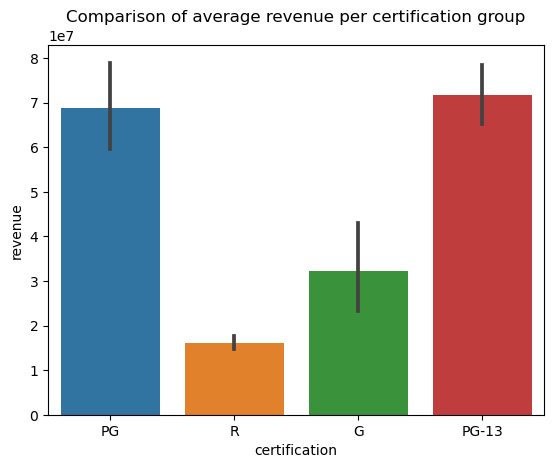

In [64]:
ax = sns.barplot(data=Q1_df_cleaned, x='certification', y='revenue' )
ax.set_title('Comparison of average revenue per certification group')

# 8. Answering Stakeholder's Question: 


**Question**: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

**Conclusion**: Yes, we support that there is a significant difference in the average revenue between the 4 groups.

# **Q2. Do movies that are over 2.5 hours long earn more revenue than movies that are less than 2.5 hours long?**

## 0. Data Preparation

In [65]:
#prepare df
Q2_df = df.copy()

In [66]:
#extract only the necessary columns
Q2_df = Q2_df[['runtime', 'revenue']]

In [67]:
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 63147
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  63124 non-null  float64
 1   revenue  63124 non-null  float64
dtypes: float64(2)
memory usage: 3.5 MB


In [68]:
#drop the row with missing values
Q2_df = Q2_df.dropna()

In [69]:
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63124 entries, 1 to 63147
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  63124 non-null  float64
 1   revenue  63124 non-null  float64
dtypes: float64(2)
memory usage: 1.4 MB


In [70]:
#inspect the units of runtime column
Q2_df['runtime'].value_counts()

90.0     4145
0.0      3602
95.0     1967
100.0    1947
85.0     1770
         ... 
250.0       1
248.0       1
37.0        1
252.0       1
208.0       1
Name: runtime, Length: 240, dtype: int64

It appears to be in minutes.

In [71]:
#create a new column that indicates whether the movie is over 2.5 hrs
Q2_df['over_150min'] = Q2_df['runtime'] > 150

In [72]:
Q2_df.head()

,runtime,revenue,over_150min
1,86.0,0.0,False
2,100.0,0.0,False
3,152.0,0.0,True
4,99.0,14204632.0,False
5,99.0,0.0,False


**Data Cleaning & Preparation is complete for Q2**.

## 1. Null Hypothesis and Alternate Hypothesis

**Null Hypothesis**: There is no difference in the revenue whether the movie is longer than 2.5 hrs or not.

**Alternative Hypothesis**: There is a significant difference in the revenue depending on whether the movie is longer than 2.5 hrs or not.

## 2. Select the Appropriate Hypothesis Test

**Test Type**: 2-sample Independent T-Test

**Justification**:
- Target 'revenue' is **numerical**.
- Comparing 2 groups of movies: **>150min** and **<150min**

## 3. Test the assumptions

Independent T-Test Assumptions:

- No significant outliers
- Normality
- Equal Variance

In [73]:
over_150 = Q2_df.loc[Q2_df['over_150min']== True,"revenue"]
under_150 = Q2_df.loc[Q2_df['over_150min']== False,"revenue"]
## Print the average revenue for each group
print(f"For Movies over 2.5 hrs (n={len(over_150)}): Mean={np.mean(over_150):.2f}")
print(f"For Movies shorter than 2.5 hrs (n={len(under_150)}): Mean={np.mean(under_150):.2f}")

For Movies over 2.5 hrs (n=1125): Mean=38489021.52
For Movies shorter than 2.5 hrs (n=61999): Mean=7475626.04


### 3.1 Check Outliers

**over_150**

In [74]:
#check initial count before removing outliers
len(over_150)

1125

In [75]:
#check for outliers
zscores_f = stats.zscore(over_150)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

24

There are 24 outliers in this group, so I will remove the outliers.

In [76]:
# remove outliers 
over_150 = over_150[(np.abs(stats.zscore(over_150)) < 3)]

In [77]:
#check final count after removing outliers
len(over_150)

1101

**under_150**

In [78]:
#check initial count before removing outliers
len(under_150)

61999

In [79]:
#check for outliers
zscores_f = stats.zscore(under_150)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

720

There are 720 outliers in this group, so I will remove the outliers.

In [80]:
# remove outliers 
under_150 = under_150[(np.abs(stats.zscore(under_150)) < 3)]

In [81]:
#check final count after removing outliers
len(under_150)

61279

### 3.2 Test for Normality

In [82]:
# normal test: over_150
result_over_150 = stats.normaltest(over_150)
result_over_150

NormaltestResult(statistic=1228.8198901364794, pvalue=1.4626864236612346e-267)

In [83]:
# normal test: under_150
result_under_150 = stats.normaltest(under_150)
result_under_150

NormaltestResult(statistic=77124.58744538008, pvalue=0.0)

**Interpretation**: For both groups, the p-value is less than 0.05, which means that the data is **NOT** normally distributed for both groups, however, since the sample size for each group is more than 15, we can proceed.

### 3.3 Test for Equal Variance

In [84]:
result = stats.levene(over_150, under_150)
result

LeveneResult(statistic=587.976307843879, pvalue=2.7486369724560385e-129)

**Interpretation**: Since p-value is less than 0.05, we do **not** have equal variance.

We will need to include `"equal_var = False"` when we perform our t-test.

## 4. Execute the selected test

In [85]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(over_150, under_150, equal_var = False)
result

Ttest_indResult(statistic=6.591227223748625, pvalue=6.748016250240863e-11)

# 5. Interpret the p-value with reference to null hypothesis

The p-value < alpha (0.05), therefore, we reject the null hypothesis and support that there is a significant difference in the revenue depending on whether the movie is longer than 2.5 hrs or not.

# 6. Visualization

Text(0.5, 1.0, 'Revenue by Movie Length')

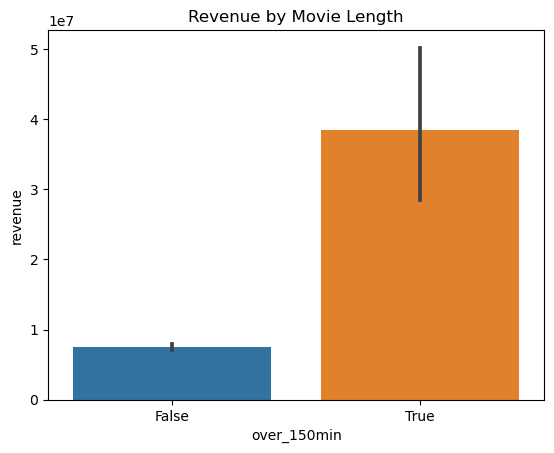

In [86]:
ax = sns.barplot(data=Q2_df, x='over_150min', y='revenue')
ax.set_title('Revenue by Movie Length')

# 7. Answering Question

**Question**: Do movies that are over 2.5 hours long earn more revenue than movies that are less than 2.5 hours long?

**Conclusion**: Yes, movies that are over 2.5 hours long earn more revenue than movies that are less than 2.5 hours long.

# **Q3. Do movies released in 2020 earn less revenue than movies released in 2019 ?**

## 0. Data Preparation

In [87]:
Q3_df = df.copy()

In [88]:
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 63147
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63124 non-null  float64
 1   belongs_to_collection  4257 non-null   object 
 2   budget                 63124 non-null  float64
 3   genres                 63124 non-null  object 
 4   id                     63124 non-null  float64
 5   original_language      63124 non-null  object 
 6   original_title         63124 non-null  object 
 7   overview               61822 non-null  object 
 8   popularity             63124 non-null  float64
 9   production_companies   63124 non-null  object 
 10  production_countries   63124 non-null  object 
 11  release_date           62042 non-null  object 
 12  revenue                63124 non-null  float64
 13  runtime                63124 non-null  float64
 14  spoken_languages       63124 non-null  object 
 15  st

In [89]:
#extract only necessary columns
Q3_df = Q3_df[['revenue','release_date']]

In [90]:
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 63147
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   revenue       63124 non-null  float64
 1   release_date  62042 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.5+ MB


In [91]:
#delete rows with missing data
Q3_df = Q3_df.dropna()

In [92]:
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62042 entries, 1 to 63147
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   revenue       62042 non-null  float64
 1   release_date  62042 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [93]:
#inspect the format of 'release_date' column
Q3_df['release_date'].value_counts()

2009-01-01    258
2010-01-01    229
2008-01-01    200
2011-01-01    195
2012-01-01    177
             ... 
2006-01-22      1
2006-03-05      1
2006-07-24      1
2012-07-30      1
2022-02-14      1
Name: release_date, Length: 7829, dtype: int64

I want to do 2 things with this 'release_date' column.

- We only care if the movie was released in 2019 or 2020, so we need a column which only tells us the YEAR of release.
- Filter so that we are only keeping data for 2019 and 2020.

In [94]:
#convert to dtype: datetime 
Q3_df['release_date'] = pd.to_datetime(Q3_df['release_date'])
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62042 entries, 1 to 63147
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   revenue       62042 non-null  float64       
 1   release_date  62042 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [95]:
#make a new column which saves the year
Q3_df['year'] = Q3_df['release_date'].dt.year

In [96]:
Q3_df.head()

,revenue,release_date,year
1,0.0,2000-09-22,2000
2,0.0,2000-11-15,2000
3,0.0,2000-04-14,2000
4,14204632.0,2000-09-29,2000
5,0.0,2000-09-02,2000


In [97]:
filter_2019 = Q3_df['year'] == 2019
Q3_df[filter_2019]

,revenue,release_date,year
7862,0.0,2019-03-26,2019
14420,0.0,2019-02-01,2019
29432,0.0,2019-02-13,2019
29503,0.0,2019-09-14,2019
29523,0.0,2019-05-04,2019
...,...,...,...
62629,0.0,2019-11-01,2019
62729,0.0,2019-12-04,2019
62746,0.0,2019-12-01,2019
62789,0.0,2019-01-15,2019


In [98]:
filter_2020 = Q3_df['year'] == 2020
Q3_df[filter_2020]

,revenue,release_date,year
11819,0.0,2020-12-12,2020
16532,0.0,2020-02-10,2020
18559,0.0,2020-02-21,2020
28909,0.0,2020-10-01,2020
29290,0.0,2020-09-09,2020
...,...,...,...
62699,0.0,2020-02-07,2020
62708,0.0,2020-12-05,2020
62879,0.0,2020-03-08,2020
63013,0.0,2020-04-15,2020


In [99]:
combined_filter = filter_2019 | filter_2020

In [100]:
Q3_df = Q3_df[combined_filter]

In [101]:
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8629 entries, 7862 to 63139
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   revenue       8629 non-null   float64       
 1   release_date  8629 non-null   datetime64[ns]
 2   year          8629 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 269.7 KB


In [103]:
Q3_df['year'].value_counts()

2019    4802
2020    3827
Name: year, dtype: int64

**Data Cleaning & Preparation is complete for Q3**

## 1. Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in revenue between movies that were released in 2019 and movies that were released in 2020.

**Alternate Hypothesis**: There is difference in revenue between movies that were released in 2019 and movies that were released in 2020.

## 2. Select the Appropriate Hypothesis Test

**Test Type**: 2-sample Independent T-Test

**Justification**:
- Target 'revenue' is Numerical
- Comparing between 2 groups: "Movies that were released in 2019" and "Movies that were released in 2020"

## 3. Test the assumptions

In [104]:
movie_2019 = Q3_df.loc[Q3_df['year']== 2019,"revenue"]
movie_2020 = Q3_df.loc[Q3_df['year']== 2020,"revenue"]
## Print the average revenue for each group
print(f"For Movies released in 2019 (n={len(movie_2019)}): Mean={np.mean(movie_2019):.2f}")
print(f"For Movies released in 2020 (n={len(movie_2020)}): Mean={np.mean(movie_2020):.2f}")

For Movies released in 2019 (n=4802): Mean=6556434.96
For Movies released in 2020 (n=3827): Mean=1516663.39


### 3.1 Check Outliers

**2019**

In [105]:
#check initial count before removing outliers
len(movie_2019)

4802

In [106]:
#check for outliers
zscores_f = stats.zscore(movie_2019)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

35

There are 35 outliers in this group, so I will remove the outliers.

In [107]:
# remove outliers 
movie_2019 = movie_2019[(np.abs(stats.zscore(movie_2019)) < 3)]

In [108]:
#check final count after removing outliers
len(movie_2019)

4767

**2020**

In [109]:
#check initial count before removing outliers
len(movie_2020)

3827

In [110]:
#check for outliers
zscores_f = stats.zscore(movie_2020)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

18

There are 18 outliers in this group, so I will remove the outliers.

In [111]:
# remove outliers 
movie_2020 = movie_2020[(np.abs(stats.zscore(movie_2020)) < 3)]

In [112]:
#check final count after removing outliers
len(movie_2020)

3809

### 3.2 Test for Normality

In [113]:
# normal test: movie_2019
result_2019 = stats.normaltest(movie_2019)
result_2019

NormaltestResult(statistic=7402.55738282762, pvalue=0.0)

In [114]:
# normal test: movie_2020
result_2020 = stats.normaltest(movie_2020)
result_2020

NormaltestResult(statistic=6140.227922519486, pvalue=0.0)

**Interpretation**: For both groups, the p-value is less than 0.05, which means that the data is NOT normally distributed for both groups, however, since the sample size for each group is more than 15, we can proceed.

### 3.3 Test for Equal Variance

In [115]:
result = stats.levene(movie_2019, movie_2020)
result

LeveneResult(statistic=41.64925427637272, pvalue=1.1512976697248497e-10)

**Interpretation**: Since p-value is less than 0.05, we do **not** have equal variance.

We will need to include `"equal_var = False"` when we perform our t-test.

## 4. Execute the selected test

In [116]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(movie_2019, movie_2020, equal_var = False)
result

Ttest_indResult(statistic=7.127433030937575, pvalue=1.1549083125041838e-12)

## 5. Interpret the p-value with reference to null hypothesis

The p-value < alpha (0.05), therefore, we reject the null hypothesis and support that there is a significant difference in the revenue between movies that were released in 2019 and those released in 2020.

## 6. Visualization

Text(0.5, 1.0, 'Revenue by Release Year')

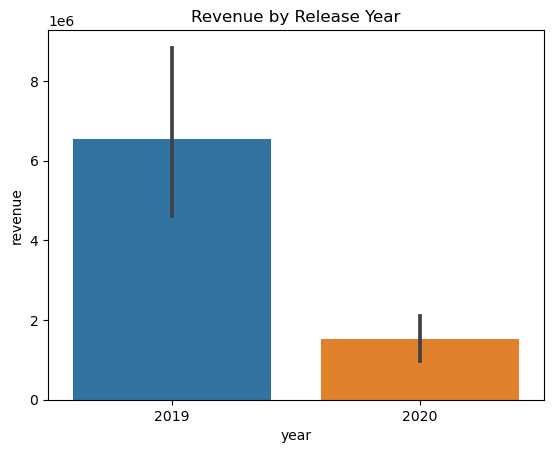

In [117]:
ax = sns.barplot(data=Q3_df, x='year', y='revenue')
ax.set_title('Revenue by Release Year')

## 7. Answering Question

**Question**: Do movies released in 2020 earn less revenue than movies released in 2019 ?

**Conclusion**: Yes, movies released in 2020 earned less revenue compared to movies released in 2019.